In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mode

In [2]:
# put the dataset that comes from long_dataset_feature_engineering.ipynb 
file_path = '/data/caysar9/results/final_long.csv'
# Load migraine data
print("Loading data...")
df = pd.read_csv(file_path)
df.head()

Loading data...


,hashed_uid,hashed_mid,age,gender,country,creationtime_local,starttime_local,endtime_local,pain_intensity,attack_type,...,gender_encoded,sleep_group,sleep_duration_past_7_days,sleep_duration_past_month,sleep_duration_past_semester,sleep_duration_past_year,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,severe_migraine
0,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,e490e673fe2d2709f168d85b1cf9ddc07ff5b32c96d9ad...,47.0,F,United States,2019-12-13 15:29:08.179,2019-12-13 15:29:00,2019-12-13 23:59:00,10.0,migraine,...,1,Adequate Sleep,8.514527,8.514527,8.514527,8.514527,1.0,8.500000,0,0
1,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,ca16c5dbfa2bd205c6249f126b560f869fb9ea9ee94346...,48.0,F,United States,2020-01-13 09:22:51.654,2020-01-13 07:55:00,2020-01-13 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.270758,9.270758,9.270758,9.270758,2.0,12.283333,0,0
2,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,ee186da8f3e3f1923f30e7eac30d7b26d5e5530a9dcd34...,48.0,F,United States,2020-02-01 08:11:47.821,2020-02-01 07:08:00,2020-02-01 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.030543,9.030543,9.030543,9.030543,3.0,13.805556,0,0
3,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,8d800b15ee8394607d96dfd38c94ca5c6591276dc6709b...,48.0,F,United States,2020-02-24 10:12:11.444,2020-02-24 08:00:00,2020-02-24 23:59:00,10.0,migraine,...,1,Adequate Sleep,9.135507,9.135507,9.135507,9.135507,4.0,14.350000,0,0
4,000d951de579a4875fe199df62ff0d4fd3940b70edf585...,03fbe091054b86710bbbb8f16a883275783bce1af2e536...,48.0,F,United States,2020-04-09 17:01:24.271,2020-04-09 07:01:00,2020-04-09 21:09:00,10.0,migraine,...,1,Adequate Sleep,9.175292,9.175292,9.175292,9.175292,5.0,14.306667,0,0


In [3]:
df.describe().round(2)

,age,pain_intensity,year,month,attack_duration_days,attack_duration_hours,sleep_duration_hours,migraine_days_per_month,trigger_poor_sleep,trigger_lack_sleep,...,affected_activity_QoL,gender_encoded,sleep_duration_past_7_days,sleep_duration_past_month,sleep_duration_past_semester,sleep_duration_past_year,migraine_attacks_past7days,mean_migraine_duration_past7days,next_migraine_in_window,severe_migraine
count,57035.00,57035.0,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,...,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.00,57035.0
mean,41.93,5.8,2020.66,6.45,0.72,17.36,7.03,3.02,0.35,0.23,...,0.54,0.88,7.04,7.04,7.04,7.04,5.91,17.19,0.34,0.1
std,11.20,1.9,0.84,3.56,0.59,14.07,2.27,2.02,0.48,0.42,...,0.50,0.41,1.59,1.50,1.49,1.49,1.95,10.11,0.47,0.3
min,18.00,0.0,2018.00,1.00,0.17,4.00,0.02,1.00,0.00,0.00,...,0.00,0.00,0.33,0.33,0.33,0.33,1.00,4.00,0.00,0.0
25%,33.00,4.0,2020.00,3.00,0.31,7.33,5.81,1.00,0.00,0.00,...,0.00,1.00,6.09,6.16,6.17,6.17,6.00,9.77,0.00,0.0
50%,42.00,6.0,2021.00,6.00,0.52,12.43,7.33,2.00,0.00,0.00,...,1.00,1.00,7.16,7.16,7.17,7.17,7.00,14.59,0.00,0.0
75%,51.00,7.0,2021.00,10.00,0.92,22.10,8.47,4.00,1.00,0.00,...,1.00,1.00,8.07,7.99,7.97,7.97,7.00,21.78,1.00,0.0
max,65.00,10.0,2022.00,12.00,3.00,72.00,23.98,10.00,1.00,1.00,...,1.00,2.00,22.52,22.52,22.52,22.52,7.00,72.00,1.00,1.0


In [4]:
# counts for unique hashed uid
categorical_vars = ['gender']

for var in categorical_vars:
    var_counts = df.groupby('hashed_uid')[var].first().value_counts()
    var_percentages = (var_counts / var_counts.sum()) * 100
    print(f"Counts for {var}:")
    print(var_counts)
    print()
    print(f"Percentages for {var}:")
    print(var_percentages.round(2))
    print()

Counts for gender:
gender
F          3099
M           446
Unknown     107
Name: count, dtype: int64

Percentages for gender:
gender
F          84.86
M          12.21
Unknown     2.93
Name: count, dtype: float64



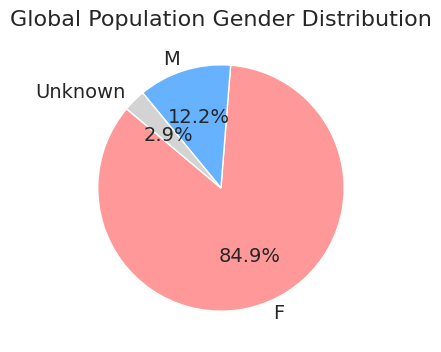

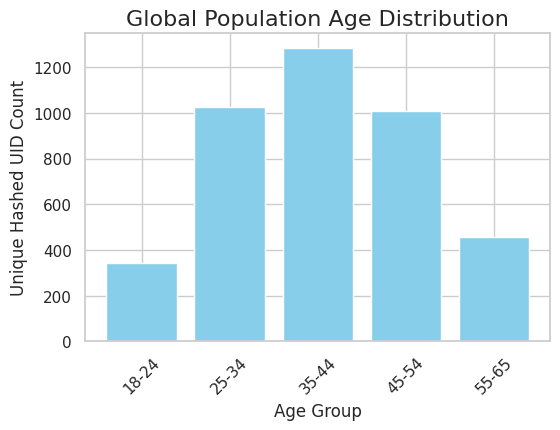

In [5]:
#style
sns.set(style="whitegrid")

unique_df_temp = df[['hashed_uid', 'gender', 'age_group', 'age']].drop_duplicates()
gender_color_map = {"F": "#FF9999", "M": "#66B2FF", "Unknown": "#D3D3D3"}

# Gender Distribution: Pie Chart (Count unique hashed_uid)
gender_distribution = unique_df_temp.groupby('gender')['hashed_uid'].nunique()

plt.figure(figsize=(6, 4))
plt.pie(
    gender_distribution, 
    labels=gender_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[gender_color_map[gender] for gender in gender_distribution.index],  
    textprops={'fontsize': 14}
)
plt.title('Global Population Gender Distribution', fontsize=16)
plt.show()

# Age Distribution: Bar Chart (Count unique hashed_uid)
age_distribution = unique_df_temp.groupby('age_group')['hashed_uid'].nunique().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(age_distribution.index, age_distribution.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Unique Hashed UID Count')
plt.title('Global Population Age Distribution', fontsize=16)
plt.xticks(rotation=45)
plt.show()


Gender Distribution Within Age Groups (Based on Hashed UID):
gender        F    M  Unknown
age_group                    
18-24       310   16       16
25-34       915   74       36
35-44      1084  166       33
45-54       821  160       27
55-65       360   88       10


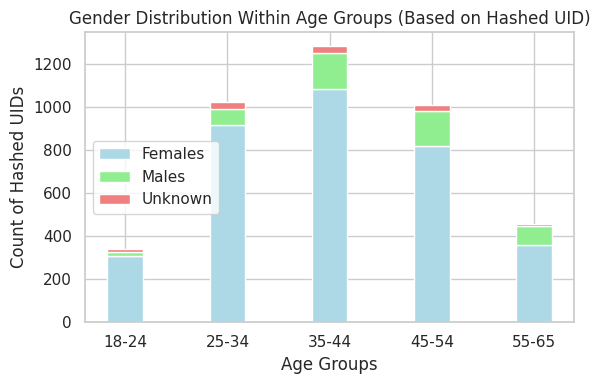

In [6]:
# Group by age_group, gender, and count distinct hashed_uid in each category
gender_distribution = df.groupby(['age_group', 'gender'])['hashed_uid'].nunique().unstack(fill_value=0)
print("Gender Distribution Within Age Groups (Based on Hashed UID):")
print(gender_distribution)

age_groups = gender_distribution.index
females = gender_distribution['F']
males = gender_distribution['M']
unknown = gender_distribution['Unknown']

bar_width = 0.35
index = np.arange(len(age_groups))

plt.figure(figsize=(6, 4))
plt.bar(index, females, bar_width, label='Females', color='lightblue')
plt.bar(index, males, bar_width, bottom=females, label='Males', color='lightgreen')
plt.bar(index, unknown, bar_width, bottom=females + males, label='Unknown', color='lightcoral')

plt.xlabel('Age Groups')
plt.ylabel('Count of Hashed UIDs')
plt.title('Gender Distribution Within Age Groups (Based on Hashed UID)')
plt.xticks(index, age_groups)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Function to calculate stats 
def calculate_stats(df, column, group_by):
    
    df[f'{column}_count'] = df[column].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

   
    grouped_data = df.groupby(group_by)[f'{column}_count']

    
    mean_value = grouped_data.mean()
    std_value = grouped_data.std()


    
    print(f"\n--- {column.capitalize()} Statistics ---")
    print(f"Mean {column} per {group_by}: {mean_value.mean():.2f}")
    print(f"Standard deviation of {column} per {group_by}: {std_value.mean():.2f}")
    
    return mean_value, std_value

# Calculate stats for triggers, reliefs, and affected_activities
columns_to_analyze = ['triggers', 'reliefs', 'affected_activities']

for column in columns_to_analyze:
    calculate_stats(df, column, 'hashed_uid')



--- Triggers Statistics ---
Mean triggers per hashed_uid: 3.37
Standard deviation of triggers per hashed_uid: 1.49

--- Reliefs Statistics ---
Mean reliefs per hashed_uid: 3.46
Standard deviation of reliefs per hashed_uid: 1.37

--- Affected_activities Statistics ---
Mean affected_activities per hashed_uid: 2.15
Standard deviation of affected_activities per hashed_uid: 0.85


In [8]:
# Function to process and count unique values for a single hashed_uid
def process_and_count_per_uid(df, column):

    modes_per_uid = {}

    for uid, group in df.groupby('hashed_uid'):
        # Split entries by comma, strip spaces, and convert to lowercase
        all_values = group[column].str.lower().str.split(',\s*').sum()
        # Count occurrences
        value_counts = Counter(all_values)

        # Find the mode 
        if value_counts:
            mode_item, mode_count = value_counts.most_common(1)[0]
            modes_per_uid[uid] = mode_item
        else:
            
            modes_per_uid[uid] = None

    return modes_per_uid

# Function to find the overall mode of the modes
def find_overall_mode(modes_dict):
    mode_counter = Counter(modes_dict.values())
    mode_counter.pop(None, None)
    if mode_counter:
        overall_mode_item, overall_mode_count = mode_counter.most_common(1)[0]
        return overall_mode_item, overall_mode_count
    else:
        return None, 0

# Calculate modes for triggers, reliefs, and affected_activities
columns_to_analyze = ['triggers', 'reliefs', 'affected_activities']

for column in columns_to_analyze:
    print(f"\n--- Mode per hashed_uid for {column} ---")
    modes = process_and_count_per_uid(df, column)

    for uid, mode_item in modes.items():
        print(f"Hashed UID: {uid}, Mode: {mode_item}")

    overall_mode_item, overall_mode_count = find_overall_mode(modes)
    print(f"Overall Mode of Modes for {column}: {overall_mode_item} ({overall_mode_count} occurrences)")



--- Mode per hashed_uid for triggers ---
Hashed UID: 000d951de579a4875fe199df62ff0d4fd3940b70edf5853e1c95907aa9fcc139, Mode: menstruation
Hashed UID: 0010367a36ffe6d704ff96b0b1d0d19470fed1580a99ab4347fa35a8779d8737, Mode: hormones
Hashed UID: 0029a37ce28511f05ef5641b633919d84bcb78e7c8d67b69dab9b875ce5b1459, Mode: weather
Hashed UID: 002ea78d3926bb6de9ffa4859f28a1dd6e7c62db03689fa91fd54564ad7a2b43, Mode: very variable weather
Hashed UID: 002f2226fcbe0a44859e4b4757feb1db143991a90f7df74044ebe7b012b63bf4, Mode: neck pain
Hashed UID: 0041995189956e71745d2ded6147a09bf0f0daf1d9d58e8e50c887b2b7f60576, Mode: hormones
Hashed UID: 00465bf878ee35cf9f5f2b2f8ad9761ea042bc6425bf29fba48151edba81f81e, Mode: exhausted
Hashed UID: 00608df87f3353e64503a0dec860640de1d6e501b47347fcb2e88edd8c98ea45, Mode: anxiety
Hashed UID: 0065a8f5e64f8265824f48de09f7d134e52fe23794aa9aecdb0f7a7b2fd57373, Mode: dehydration
Hashed UID: 006738c2695e5437b2ce4e3d86ff3fbf9a82ef9c21fb3b664f3be6035cf7c349, Mode: dehydration
Hashe

In [9]:
# Function to process and count unique values in the column
def process_and_count(df, column):
    # Split the entries by comma, strip spaces, and convert to lowercase
    all_values = df[column].str.lower().str.split(',\s*').sum() 
    # Count each unique value
    value_counts = Counter(all_values)
    return value_counts

# Dictionaries to store the top 5 most common values
top_5_triggers = {}
top_5_reliefs = {}
top_5_affected_activities = {}

for col, storage_dict in zip(['triggers', 'reliefs', 'affected_activities'],
                             [top_5_triggers, top_5_reliefs, top_5_affected_activities]):
    print(f"\n--- {col} ---")
    counts = process_and_count(df, col)
    
    # Store top 5 most common values in the dictionary
    top_5_items = counts.most_common(5)
    for item, count in top_5_items:
        storage_dict[item] = count
    
    for item, count in top_5_items:
        print(f"{item}: {count}")
    
    # Print
    print(f"Number of unique {col}: {len(counts)}")




--- triggers ---


stress: 18705
very variable weather: 12991
lack of sleep: 12640
neck pain: 11983
anxiety: 10741
Number of unique triggers: 1640

--- reliefs ---
drink water: 27649
sleep: 26818
dark room rest: 24892
food: 21875
caffeine: 19192
Number of unique reliefs: 1312

--- affected_activities ---
slower [at home]: 32201
hard to concentrate: 20461
slower [at work]: 13968
woke up during sleep: 11155
no screen / phone: 9539
Number of unique affected_activities: 30


/tmp/ipykernel_77071/2050285601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_triggers.values()), y=list(top_5_triggers.keys()), palette=triggers_palette)


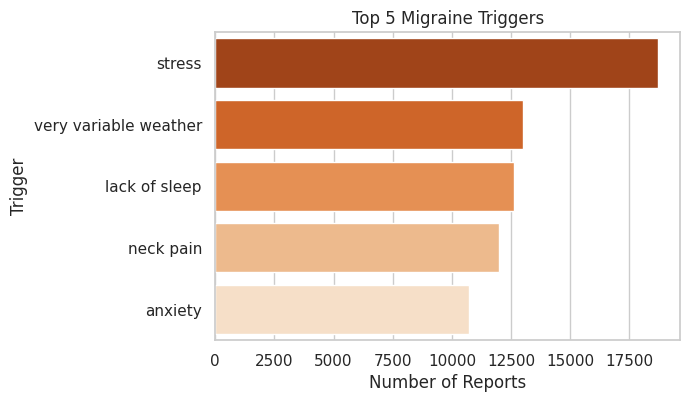

/tmp/ipykernel_77071/2050285601.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_reliefs.values()), y=list(top_5_reliefs.keys()), palette=reliefs_palette)


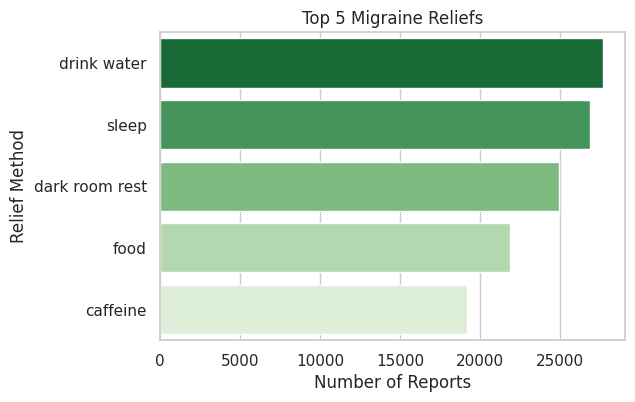

/tmp/ipykernel_77071/2050285601.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_affected_activities.values()), y=list(top_5_affected_activities.keys()), palette=activities_palette)


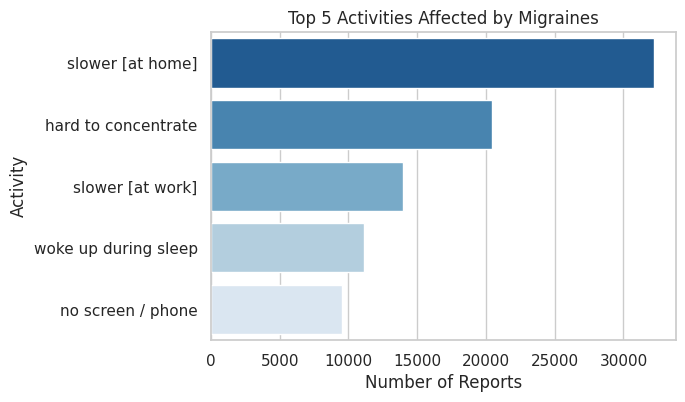

In [10]:
# Triggers: Bar Plot for Top 5 Triggers
plt.figure(figsize=(6, 4))
triggers_palette = sns.color_palette("Oranges", len(top_5_triggers))[::-1] 
sns.barplot(x=list(top_5_triggers.values()), y=list(top_5_triggers.keys()), palette=triggers_palette)
plt.title('Top 5 Migraine Triggers')
plt.xlabel('Number of Reports')
plt.ylabel('Trigger')
plt.show()

# Reliefs: Bar Plot for Top 5 Reliefs
plt.figure(figsize=(6, 4))
reliefs_palette = sns.color_palette("Greens", len(top_5_reliefs))[::-1]  
sns.barplot(x=list(top_5_reliefs.values()), y=list(top_5_reliefs.keys()), palette=reliefs_palette)
plt.title('Top 5 Migraine Reliefs')
plt.xlabel('Number of Reports')
plt.ylabel('Relief Method')
plt.show()

# Activities Affected: Bar Plot for Top 5 Affected Activities
plt.figure(figsize=(6, 4))
activities_palette = sns.color_palette("Blues", len(top_5_affected_activities))[::-1] 
sns.barplot(x=list(top_5_affected_activities.values()), y=list(top_5_affected_activities.keys()), palette=activities_palette)
plt.title('Top 5 Activities Affected by Migraines')
plt.xlabel('Number of Reports')
plt.ylabel('Activity')
plt.show()


In [11]:
# Calculate the number of unique users (hashed_uid) in each country
user_counts = df.groupby('country')['hashed_uid'].nunique()

# Get the top 5 countries based on unique user counts and store in a list
top_5_countries = user_counts.nlargest(5).index.tolist()

# Print the top 5 countries and their unique user counts
print("Top 5 countries by unique user count:")
print(user_counts.nlargest(5))


Top 5 countries by unique user count:
country
United States     2681
United Kingdom     433
Canada             282
Australia          121
Ireland             29
Name: hashed_uid, dtype: int64


In [12]:
# Filter the original dataframe to include only the top 5 countries
df_top_5 = df[df['country'].isin(top_5_countries)]

# Calculate the number of migraine episodes (total rows) in each of the top 5 countries
migraine_episodes_top_5 = df_top_5.groupby('country').size()

# Print the results
print("Number of migraine episodes in each of the top 5 countries:")
print(migraine_episodes_top_5)


Number of migraine episodes in each of the top 5 countries:
country
Australia          1292
Canada             4306
Ireland             609
United Kingdom     6019
United States     41942
dtype: int64


In [13]:
# Calculate the unique count of users by gender for each of the top 5 countries
gender_counts_top_5 = df_top_5.groupby(['country', 'gender'])['hashed_uid'].nunique().unstack(fill_value=0)

print("Unique count of users by gender in each of the top 5 countries:")
print(gender_counts_top_5)


Unique count of users by gender in each of the top 5 countries:
gender             F    M  Unknown
country                           
Australia        108   11        2
Canada           236   35       11
Ireland           24    5        0
United Kingdom   357   58       18
United States   2303  307       71


In [14]:
# Calculate the unique count of users by age group for each of the top 5 countries
age_group_counts_top_5 = df_top_5.groupby(['country', 'age_group'])['hashed_uid'].nunique().unstack(fill_value=0)

# Print the result
print("Unique count of users by age group in each of the top 5 countries:")
print(age_group_counts_top_5)


Unique count of users by age group in each of the top 5 countries:
age_group       18-24  25-34  35-44  45-54  55-65
country                                          
Australia           5     38     43     29     18
Canada             28     98     86     65     38
Ireland             2      3     17      4      6
United Kingdom     40    104    144    143     46
United States     250    734    957    746    347


/tmp/ipykernel_77071/1727153548.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  std_dev_episodes_per_user = df_filtered.groupby(['year', 'country']).apply(



Average number of migraine episodes per user per year for top 5 countries (with standard deviation):
    year         country  average_episodes_per_user  std_dev_episodes_per_user
0   2019       Australia                   1.604651                   1.136820
1   2019          Canada                   2.304762                   1.835147
2   2019         Ireland                   3.333333                   2.872281
3   2019  United Kingdom                   2.674797                   2.536604
4   2019   United States                   2.469469                   2.228621
5   2020       Australia                   5.415730                   7.375958
6   2020          Canada                   7.404444                   8.751580
7   2020         Ireland                  10.500000                  12.842452
8   2020  United Kingdom                   6.840909                   9.705212
9   2020   United States                   7.911039                   9.737802
10  2021       Australia     

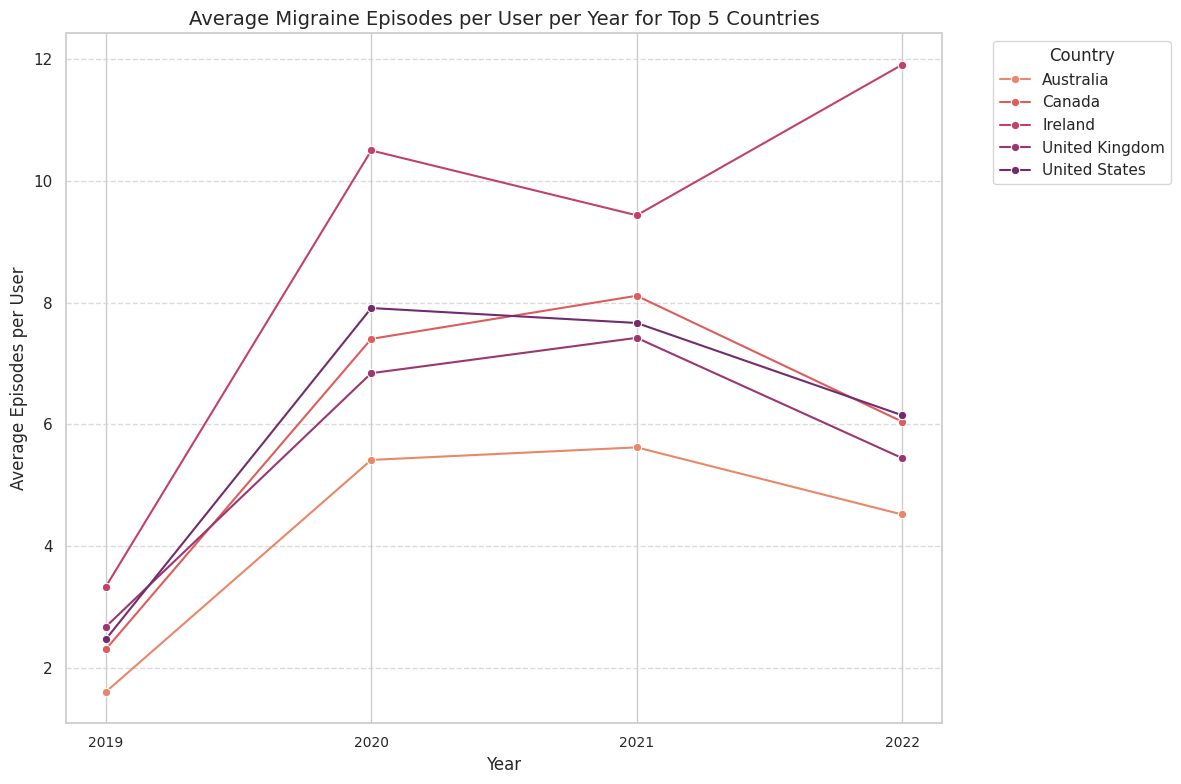

In [31]:
# Exclude the year 2018 from the dataset -> lack of data-> better visualization
df_filtered = df_top_5[df_top_5['year'] != 2018]

# Calculate the number of unique users (hashed_uid) per year per country
user_counts_per_year_country = df_filtered.groupby(['year', 'country'])['hashed_uid'].nunique()

# Calculate the total number of migraine episodes (rows) per year per country
migraine_episodes_per_year_country = df_filtered.groupby(['year', 'country']).size()

# Calculate the average number of episodes per user per year per country
average_episodes_per_user_per_year_country = (
    migraine_episodes_per_year_country / user_counts_per_year_country
)

# Calculate the stdev of episodes per user per year per country
std_dev_episodes_per_user = df_filtered.groupby(['year', 'country']).apply(
    lambda x: x.groupby('hashed_uid').size().std()
)

average_episodes_per_user_per_year_country = average_episodes_per_user_per_year_country.reset_index(name='average_episodes_per_user')
std_dev_episodes_per_user = std_dev_episodes_per_user.reset_index(name='std_dev_episodes_per_user')

summary_data = average_episodes_per_user_per_year_country.merge(
    std_dev_episodes_per_user, on=['year', 'country']
)

 
print("\nAverage number of migraine episodes per user per year for top 5 countries (with standard deviation):")
print(summary_data)

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=summary_data,
    x="year",
    y="average_episodes_per_user",
    hue="country",
    marker="o",
    palette="flare"
)

plt.title("Average Migraine Episodes per User per Year for Top 5 Countries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Episodes per User", fontsize=12)
plt.xticks(ticks=sorted(summary_data['year'].unique()), fontsize=10)  # only integer numbers in x axis
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


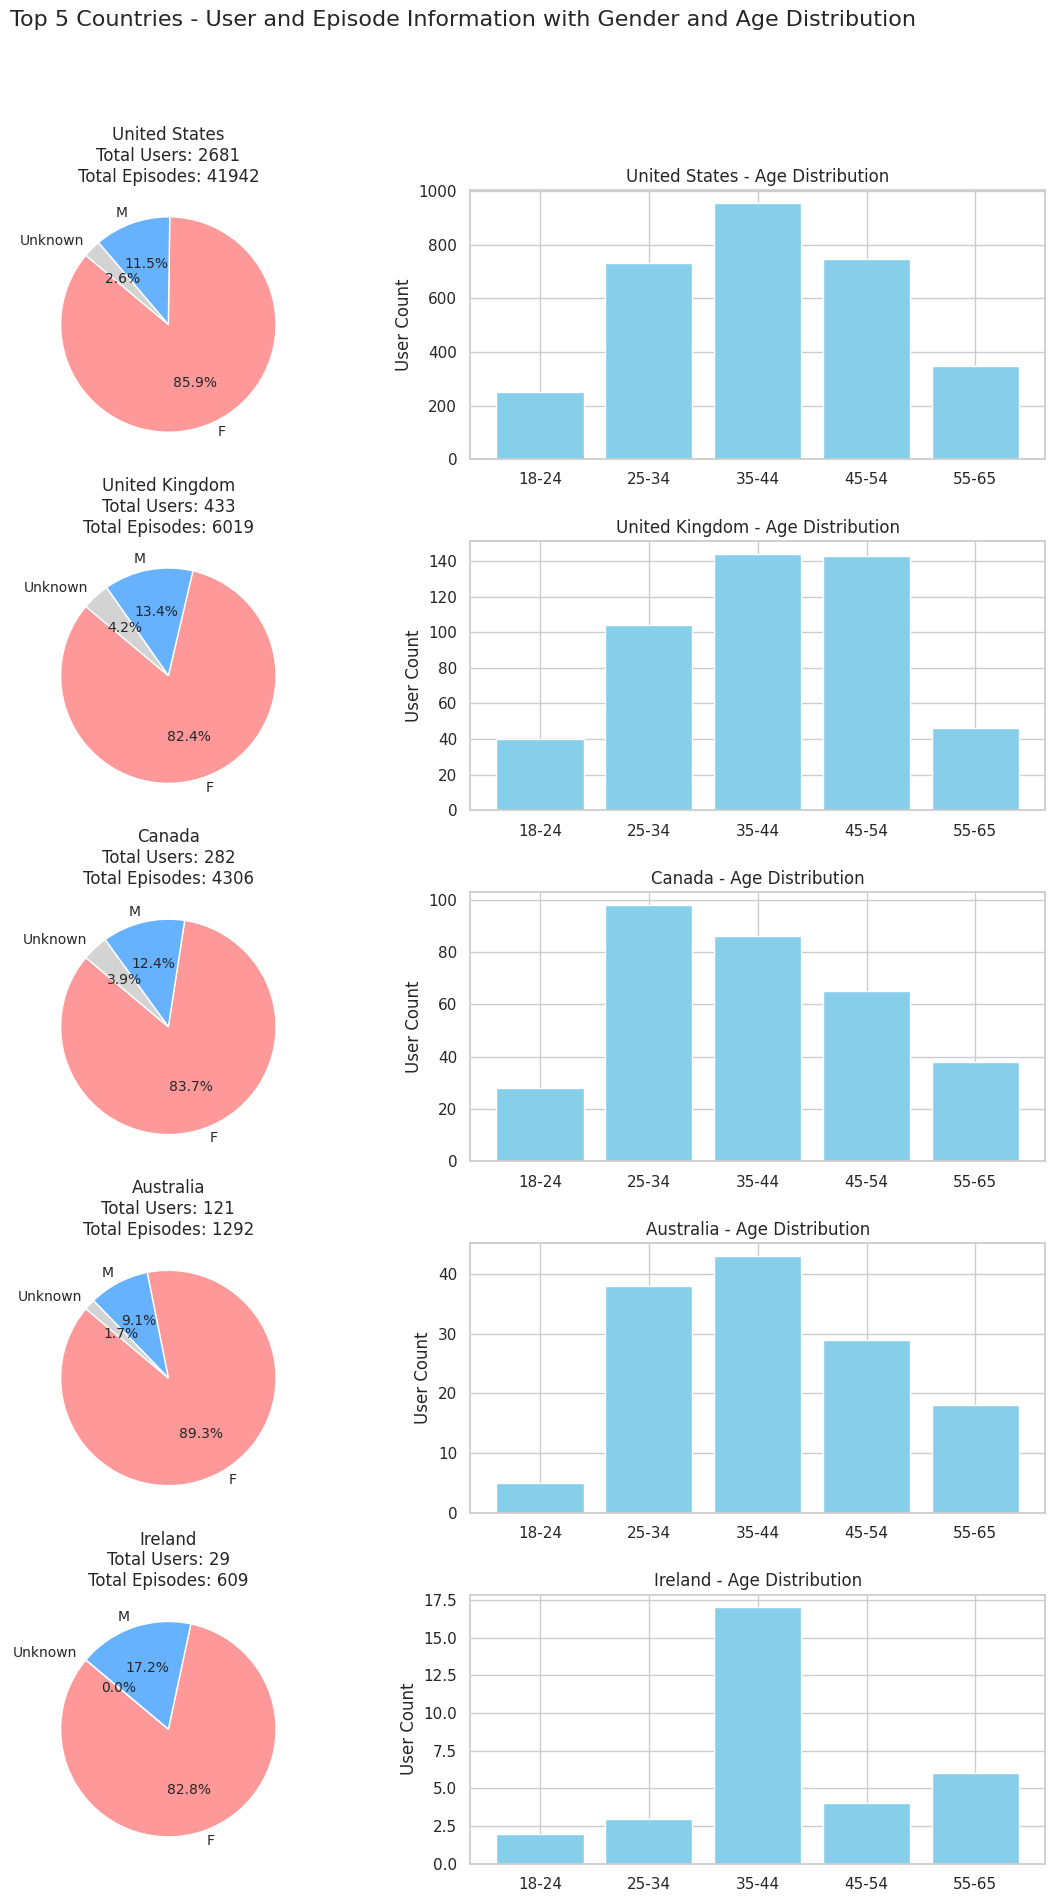

In [16]:
# Plot setup
fig, axes = plt.subplots(5, 2, figsize=(12, 20), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle("Top 5 Countries - User and Episode Information with Gender and Age Distribution", fontsize=16)

for i, country in enumerate(top_5_countries):
    # Gender Distribution Pie Chart
    gender_data = gender_counts_top_5.loc[country].values
    axes[i, 0].pie(
        gender_data, labels=gender_counts_top_5.columns, autopct='%1.1f%%', startangle=140,
        colors=["#FF9999", "#66B2FF", "#D3D3D3"], textprops={'size': 'small'}
    )
    axes[i, 0].set_title(f"{country}\nTotal Users: {user_counts[country]}\nTotal Episodes: {migraine_episodes_top_5[country]}")

    # Age Distribution Bar Chart
    age_data = age_group_counts_top_5.loc[country].fillna(0).values
    axes[i, 1].bar(age_group_counts_top_5.columns, age_data, color="skyblue")
    axes[i, 1].set_title(f"{country} - Age Distribution")
    axes[i, 1].set_ylabel("User Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
# Calculate average migraine days per month, migraine duration, and pain intensity for each of the top 5 countries
average_stats_top_5 = df_top_5.groupby('country').agg({
    'migraine_days_per_month': 'mean',
    'attack_duration_hours': 'mean',
    'pain_intensity': 'mean'
}).rename(columns={
    'migraine_days_per_month': 'Avg Migraine Days/Month',
    'attack_duration_hours': 'Avg Migraine Duration (hours)',
    'pain_intensity': 'Avg Pain Intensity'
})

# Display the calculated averages
average_stats_top_5

,Avg Migraine Days/Month,Avg Migraine Duration (hours),Avg Pain Intensity
country,,,
Australia,2.375387,18.247601,5.342105
Canada,2.935207,18.387921,5.866001
Ireland,3.596059,18.774138,6.295567
United Kingdom,3.002492,18.270940,5.678684
United States,3.021315,17.143165,5.851986


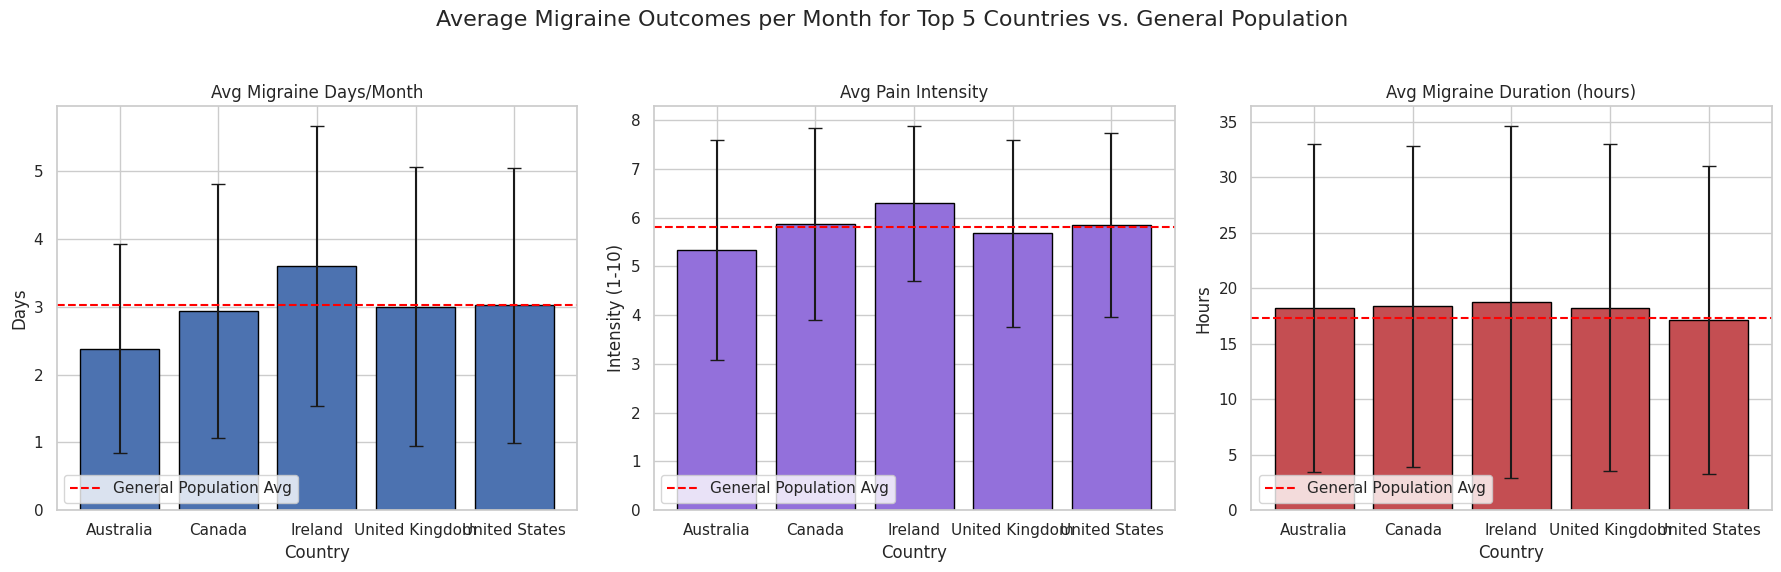

General Population Statistics:
Average Migraine Days/Month: 3.02 ± 2.02
Average Migraine Duration (hours): 17.36 ± 14.07
Average Pain Intensity: 5.8 ± 1.9

Top 5 Countries Statistics:
                Avg Migraine Days/Month  Migraine Days Std  \
country                                                      
Australia                          2.38               1.54   
Canada                             2.94               1.87   
Ireland                            3.60               2.07   
United Kingdom                     3.00               2.06   
United States                      3.02               2.03   

                Avg Migraine Duration (hours)  Duration Std  \
country                                                       
Australia                               18.25         14.79   
Canada                                  18.39         14.48   
Ireland                                 18.77         15.90   
United Kingdom                          18.27         14.77   
Uni

In [33]:
# Calculate overall averages and standard deviations for migraine outcomes for the general population
general_avg_stats = df[['migraine_days_per_month', 'attack_duration_hours', 'pain_intensity']].mean().round(2)
general_std_stats = df[['migraine_days_per_month', 'attack_duration_hours', 'pain_intensity']].std().round(2)

general_avg_migraine_days = general_avg_stats['migraine_days_per_month']
general_avg_duration_hours = general_avg_stats['attack_duration_hours']
general_avg_pain_intensity = general_avg_stats['pain_intensity']

# Calculate average and standard deviation for the top 5 countries
average_stats_top_5 = df_top_5.groupby('country').agg({
    'migraine_days_per_month': ['mean', 'std'],
    'attack_duration_hours': ['mean', 'std'],
    'pain_intensity': ['mean', 'std']
}).round(2)

average_stats_top_5.columns = [
    'Avg Migraine Days/Month', 'Migraine Days Std',
    'Avg Migraine Duration (hours)', 'Duration Std',
    'Avg Pain Intensity', 'Pain Intensity Std'
]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Average Migraine Outcomes per Month for Top 5 Countries vs. General Population", fontsize=16)

# Define colors for the charts
colors = ["#4C72B0", "#9370DB", "#C44E52"]

# Plot Avg Migraine Days/Month
axes[0].bar(
    average_stats_top_5.index,
    average_stats_top_5['Avg Migraine Days/Month'],
    yerr=average_stats_top_5['Migraine Days Std'],
    color=colors[0],
    edgecolor="black",
    capsize=5
)
axes[0].axhline(general_avg_migraine_days, color='red', linestyle='--', linewidth=1.5, label='General Population Avg')
axes[0].set_title("Avg Migraine Days/Month")
axes[0].set_ylabel("Days")
axes[0].set_xlabel("Country")

# Plot Avg Pain Intensity
axes[1].bar(
    average_stats_top_5.index,
    average_stats_top_5['Avg Pain Intensity'],
    yerr=average_stats_top_5['Pain Intensity Std'],
    color=colors[1],
    edgecolor="black",
    capsize=5
)
axes[1].axhline(general_avg_pain_intensity, color='red', linestyle='--', linewidth=1.5, label='General Population Avg')
axes[1].set_title("Avg Pain Intensity")
axes[1].set_ylabel("Intensity (1-10)")
axes[1].set_xlabel("Country")

# Plot Avg Migraine Duration (hours) 
axes[2].bar(
    average_stats_top_5.index,
    average_stats_top_5['Avg Migraine Duration (hours)'],
    yerr=average_stats_top_5['Duration Std'],
    color=colors[2],
    edgecolor="black",
    capsize=5
)
axes[2].axhline(general_avg_duration_hours, color='red', linestyle='--', linewidth=1.5, label='General Population Avg')
axes[2].set_title("Avg Migraine Duration (hours)")
axes[2].set_ylabel("Hours")
axes[2].set_xlabel("Country")

for ax in axes:
    ax.legend(loc='lower left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# General Population Statistics
print("General Population Statistics:")
print(f"Average Migraine Days/Month: {general_avg_stats['migraine_days_per_month']} ± {general_std_stats['migraine_days_per_month']}")
print(f"Average Migraine Duration (hours): {general_avg_stats['attack_duration_hours']} ± {general_std_stats['attack_duration_hours']}")
print(f"Average Pain Intensity: {general_avg_stats['pain_intensity']} ± {general_std_stats['pain_intensity']}\n")

# Top 5 Countries Statistics
print("Top 5 Countries Statistics:")
print(average_stats_top_5)



/tmp/ipykernel_77071/1313647510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['triggers_split'] = df_top_5['triggers'].str.lower().str.split(',\s*')


Top 5 Triggers and Number of Reports with Each Trigger per Country:
           country     individual_trigger  episode_count  percentage
0        Australia                anxiety            241   18.653251
1        Australia          lack of sleep            321   24.845201
2        Australia              neck pain            293   22.678019
3        Australia                 stress            413   31.965944
4        Australia  very variable weather            144   11.145511
5           Canada                anxiety            594   13.794705
6           Canada          lack of sleep           1040   24.152346
7           Canada              neck pain            812   18.857408
8           Canada                 stress           1213   28.169995
9           Canada  very variable weather           1010   23.455643
10         Ireland                anxiety            180   29.556650
11         Ireland          lack of sleep            250   41.050903
12         Ireland              nec

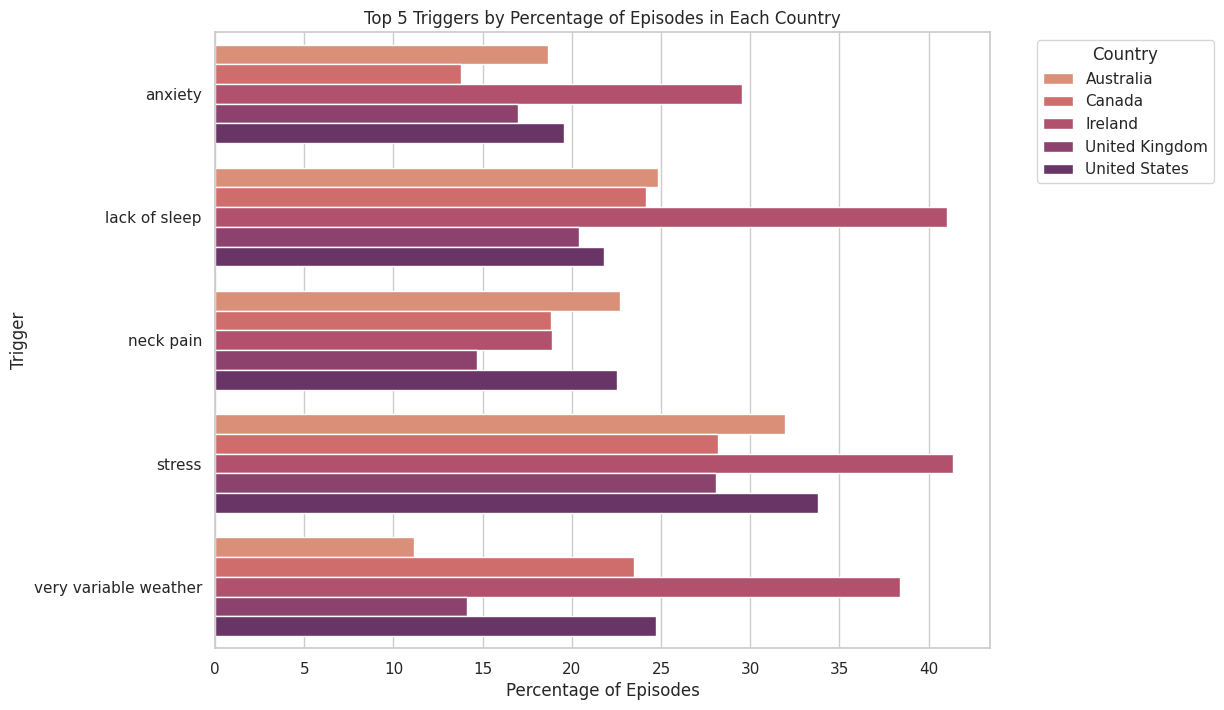

In [19]:
# Top 5 Triggers by Percentage of Episodes in Each Country

# Split the 'triggers' column into individual triggers
df_top_5['triggers_split'] = df_top_5['triggers'].str.lower().str.split(',\s*')

# Ensure that the list of triggers so each trigger is a separate row
df_exploded = df_top_5.explode('triggers_split')

df_exploded.rename(columns={'triggers_split': 'individual_trigger'}, inplace=True)

# Filter rows to include only those with the top 5 triggers
top_5_triggers_data = df_exploded[df_exploded['individual_trigger'].isin(top_5_triggers)]

# Calculate the total episodes per country
total_episodes_by_country = df_top_5.groupby('country').size()

# Calculate the counts of each individual trigger per country
trigger_counts_by_country = top_5_triggers_data.groupby(['country', 'individual_trigger']).size().reset_index(name='episode_count')

# Calculate the percentage of episodes per trigger for each country
trigger_counts_by_country['percentage'] = trigger_counts_by_country.apply(
    lambda row: (row['episode_count'] / total_episodes_by_country[row['country']]) * 100, axis=1
)

# Print 
print("Top 5 Triggers and Number of Reports with Each Trigger per Country:")
print(trigger_counts_by_country[['country', 'individual_trigger', 'episode_count', 'percentage']])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=trigger_counts_by_country, x='percentage', y='individual_trigger', hue='country', palette="flare")
plt.title("Top 5 Triggers by Percentage of Episodes in Each Country")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Trigger")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_77071/1076462771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['reliefs_split'] = df_top_5['reliefs'].str.lower().str.split(',\s*')


Top 5 Reliefs and Number of Reports with Each Relief per Country:
           country individual_relief  episode_count  percentage
0        Australia          caffeine            314   24.303406
1        Australia    dark room rest            539   41.718266
2        Australia       drink water            545   42.182663
3        Australia              food            413   31.965944
4        Australia             sleep            629   48.684211
5           Canada          caffeine           1285   29.842081
6           Canada    dark room rest           1801   41.825360
7           Canada       drink water           2278   52.902926
8           Canada              food           1548   35.949837
9           Canada             sleep           2172   50.441245
10         Ireland          caffeine            196   32.183908
11         Ireland    dark room rest            230   37.766831
12         Ireland       drink water            216   35.467980
13         Ireland              food  

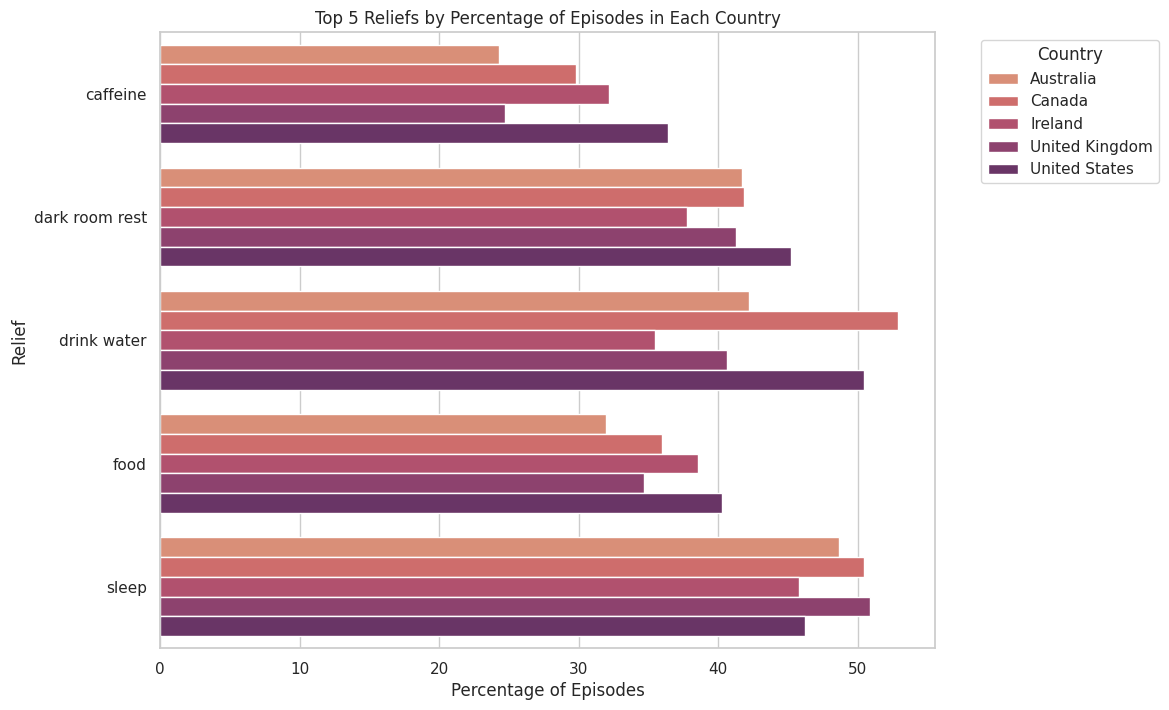

In [20]:
# Top 5 Reliefs by Percentage of Episodes in Each Country

# Split the 'reliefs' column into individual reliefs
df_top_5['reliefs_split'] = df_top_5['reliefs'].str.lower().str.split(',\s*')

# Ensure that  the list of reliefs so each relief is a separate row
df_exploded_reliefs = df_top_5.explode('reliefs_split')

df_exploded_reliefs.rename(columns={'reliefs_split': 'individual_relief'}, inplace=True)

# Filter rows to include only those with the top 5 reliefs
top_5_reliefs_data = df_exploded_reliefs[df_exploded_reliefs['individual_relief'].isin(top_5_reliefs)]

# Calculate the total episodes per country
total_episodes_by_country = df_top_5.groupby('country').size()

# Calculate the counts of each individual relief per country
relief_counts_by_country = top_5_reliefs_data.groupby(['country', 'individual_relief']).size().reset_index(name='episode_count')

# Calculate the percentage of episodes per relief for each country
relief_counts_by_country['percentage'] = relief_counts_by_country.apply(
    lambda row: (row['episode_count'] / total_episodes_by_country[row['country']]) * 100, axis=1
)

# Print 
print("Top 5 Reliefs and Number of Reports with Each Relief per Country:")
print(relief_counts_by_country[['country', 'individual_relief', 'episode_count', 'percentage']])

# Plot 
plt.figure(figsize=(10, 8))
sns.barplot(data=relief_counts_by_country, x='percentage', y='individual_relief', hue='country', palette="flare")
plt.title("Top 5 Reliefs by Percentage of Episodes in Each Country")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Relief")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_77071/669137499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['affected_activities_split'] = df_top_5['affected_activities'].str.lower().str.split(',\s*')


Top 5 Affected Activities and Number of Reports with Each Activity per Country:
           country   individual_activity  episode_count  percentage
0        Australia   hard to concentrate            338   26.160991
1        Australia     no screen / phone            244   18.885449
2        Australia      slower [at home]            695   53.792570
3        Australia      slower [at work]            297   22.987616
4        Australia  woke up during sleep            252   19.504644
5           Canada   hard to concentrate           1376   31.955411
6           Canada     no screen / phone            629   14.607524
7           Canada      slower [at home]           2448   56.850906
8           Canada      slower [at work]           1187   27.566187
9           Canada  woke up during sleep            931   21.620994
10         Ireland   hard to concentrate            320   52.545156
11         Ireland     no screen / phone             55    9.031199
12         Ireland      slower [at h

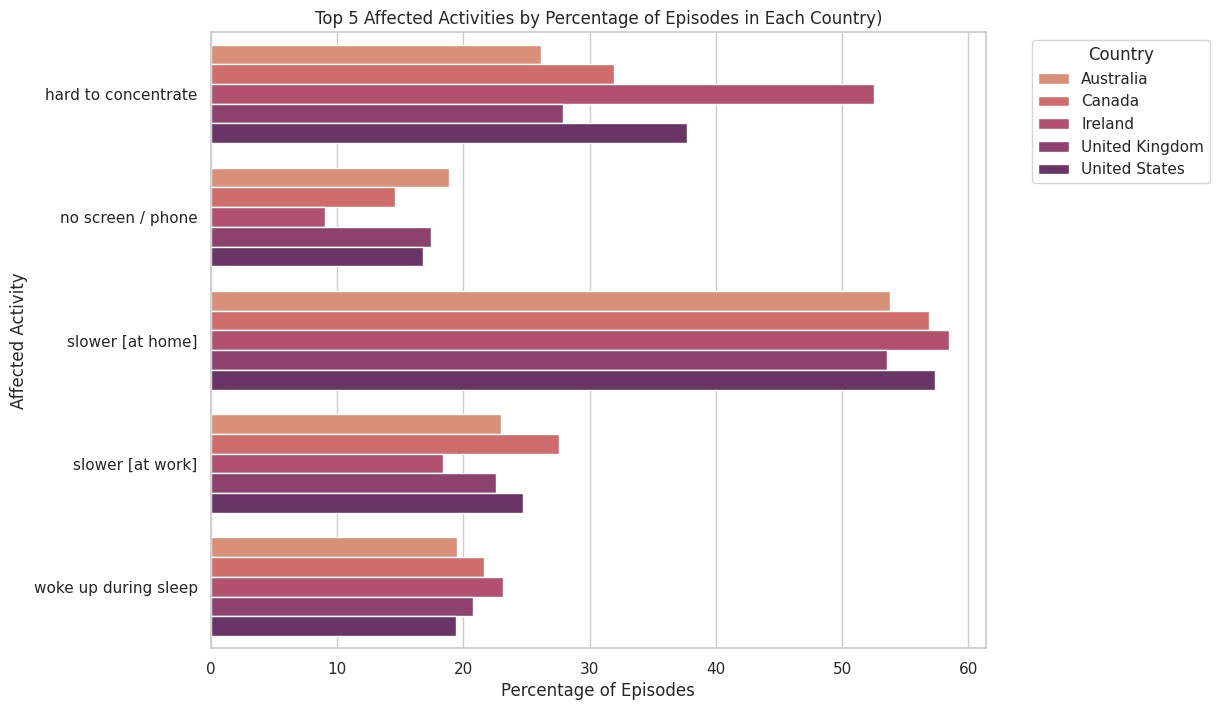

In [21]:
# Top 5 Affected Activities by Percentage of Episodes in Each Country

# Split the 'affected_activities' column into individual activities
df_top_5['affected_activities_split'] = df_top_5['affected_activities'].str.lower().str.split(',\s*')

# Similarly to the triggers and reliefs we ensure that the list of activities so each activity is a separate row
df_exploded_activities = df_top_5.explode('affected_activities_split')

df_exploded_activities.rename(columns={'affected_activities_split': 'individual_activity'}, inplace=True)

# Filter rows to include only those with the top 5 affected activities
top_5_activities_data = df_exploded_activities[df_exploded_activities['individual_activity'].isin(top_5_affected_activities)]

# Calculate the total episodes per country
total_episodes_by_country = df_top_5.groupby('country').size()

# Calculate the counts of each individual affected activity per country
activity_counts_by_country = top_5_activities_data.groupby(['country', 'individual_activity']).size().reset_index(name='episode_count')

# Calculate the percentage of episodes per affected activity for each country
activity_counts_by_country['percentage'] = activity_counts_by_country.apply(
    lambda row: (row['episode_count'] / total_episodes_by_country[row['country']]) * 100, axis=1
)

# Print the updated counts
print("Top 5 Affected Activities and Number of Reports with Each Activity per Country:")
print(activity_counts_by_country[['country', 'individual_activity', 'episode_count', 'percentage']])

# Plot the updated data
plt.figure(figsize=(10, 8))
sns.barplot(data=activity_counts_by_country, x='percentage', y='individual_activity', hue='country', palette="flare")
plt.title("Top 5 Affected Activities by Percentage of Episodes in Each Country)")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Affected Activity")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [22]:
# Calculate the total number of episodes for specific triggers
specific_triggers = ['trigger_stress', 'trigger_poor_sleep', 'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity']

# Count the occurrences of each specific trigger in the DataFrame
trigger_counts = df_top_5[specific_triggers].sum()

# Display the results
print("Number of Episodes Reporting Each Specific Trigger:")
print(trigger_counts)


Number of Episodes Reporting Each Specific Trigger:
trigger_stress                    20289
trigger_poor_sleep                18732
trigger_lack_sleep                12429
trigger_physical_activity          2418
trigger_lack_physical_activity     5308
dtype: int64


Specific Triggers and Number of Reports with Each Trigger per Country:
           country                         Trigger  Episode Count  percentage
0        Australia                  trigger_stress            488   37.770898
1           Canada                  trigger_stress           1378   32.001858
2          Ireland                  trigger_stress            285   46.798030
3   United Kingdom                  trigger_stress           2072   34.424323
4    United States                  trigger_stress          16066   38.305279
5        Australia              trigger_poor_sleep            475   36.764706
6           Canada              trigger_poor_sleep           1556   36.135625
7          Ireland              trigger_poor_sleep            323   53.037767
8   United Kingdom              trigger_poor_sleep           1954   32.463864
9    United States              trigger_poor_sleep          14424   34.390349
10       Australia              trigger_lack_sleep            336   26.

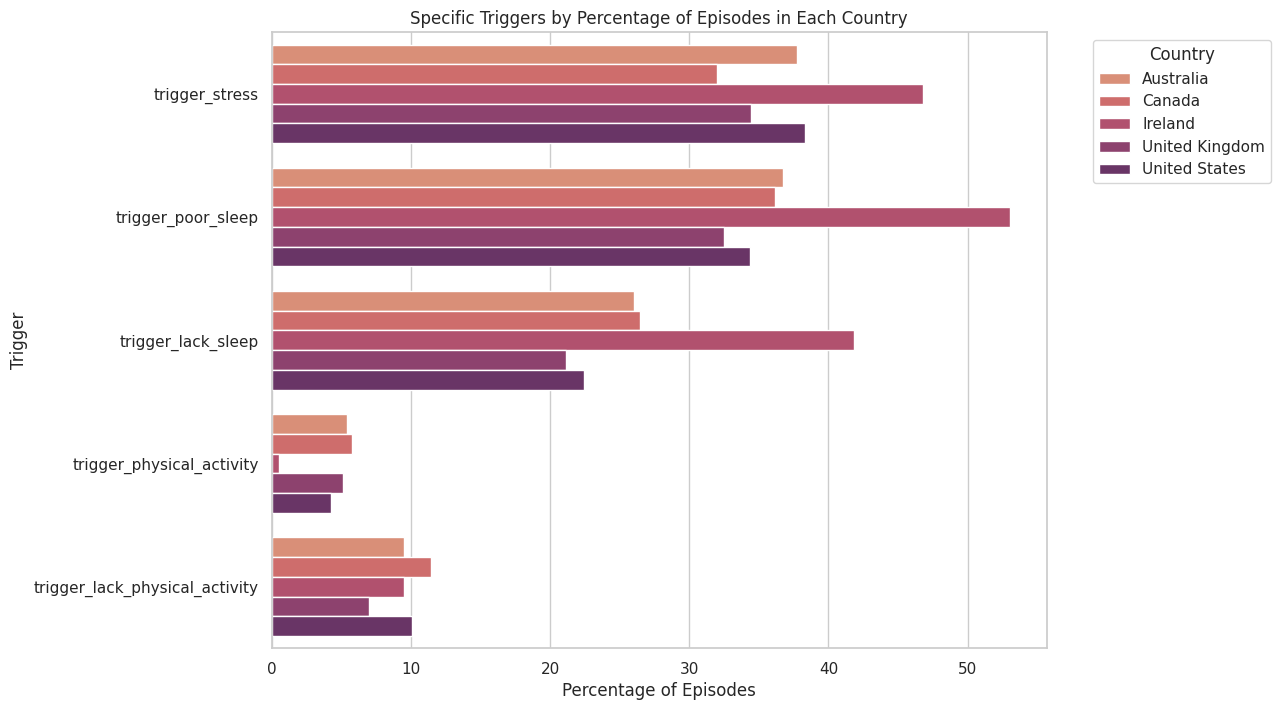

In [23]:
# Define the specific triggers to analyze
specific_triggers = ['trigger_stress', 'trigger_poor_sleep', 'trigger_lack_sleep', 'trigger_physical_activity', 'trigger_lack_physical_activity']

# Calculate the total episodes per country
total_episodes_by_country = df_top_5.groupby('country').size()

# Calculate the counts of each specific trigger per country
trigger_counts_by_country = df_top_5.groupby(['country'])[specific_triggers].sum().reset_index()

trigger_counts_long = trigger_counts_by_country.melt(id_vars='country', value_vars=specific_triggers, 
                                                     var_name='Trigger', value_name='Episode Count')

# Calculate the percentage of episodes per trigger for each country
trigger_counts_long['percentage'] = trigger_counts_long.apply(
    lambda row: (row['Episode Count'] / total_episodes_by_country[row['country']]) * 100, axis=1
)

# Filter to include only the specified triggers
top_triggers_data = trigger_counts_long[trigger_counts_long['Trigger'].isin(specific_triggers)]

print("Specific Triggers and Number of Reports with Each Trigger per Country:")
print(top_triggers_data[['country', 'Trigger', 'Episode Count', 'percentage']])

# Plotting the triggers with country percentages
plt.figure(figsize=(10, 8))
sns.barplot(data=top_triggers_data, x='percentage', y='Trigger', hue='country', palette="flare")
plt.title("Specific Triggers by Percentage of Episodes in Each Country")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Trigger")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_77071/3750497602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['triggers_split'] = df_filtered['triggers'].str.lower().str.split(',\s*')


Top 5 Triggers and Number of Reports with Each Trigger per Year:
    year     individual_trigger  episode_count  percentage
0   2019                anxiety            598   18.077388
1   2019          lack of sleep            776   23.458283
2   2019              neck pain            739   22.339782
3   2019                 stress            991   29.957678
4   2019  very variable weather            703   21.251511
5   2020                anxiety           4382   19.057974
6   2020          lack of sleep           4923   21.410864
7   2020              neck pain           5011   21.793589
8   2020                 stress           7340   31.922759
9   2020  very variable weather           5102   22.189362
10  2021                anxiety           3786   18.673243
11  2021          lack of sleep           4588   22.628853
12  2021              neck pain           4121   20.325524
13  2021                 stress           6734   33.213317
14  2021  very variable weather           4704   2

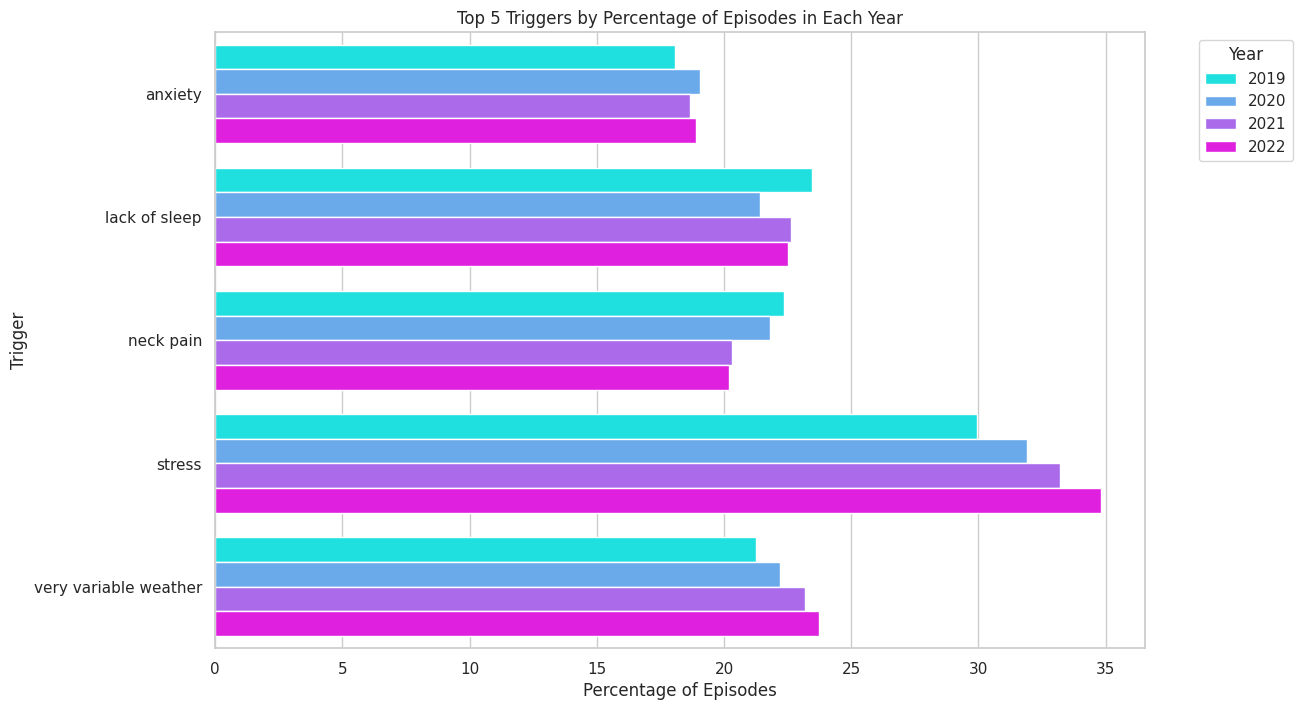

In [24]:
# Exclude the year 2018 from the dataset -> lack of data for triggerss
df_filtered = df[df['year'] != 2018]


# Split the 'triggers' column into individual triggers
df_filtered['triggers_split'] = df_filtered['triggers'].str.lower().str.split(',\s*')

# Explode the list of triggers so each trigger is a separate row
df_exploded = df_filtered.explode('triggers_split')

# Rename for clarity
df_exploded.rename(columns={'triggers_split': 'individual_trigger'}, inplace=True)

# Filter rows to include only those with the top 5 triggers
top_5_triggers_data = df_exploded[df_exploded['individual_trigger'].isin(top_5_triggers)]

# Calculate the total episodes per year
total_episodes_by_year = df.groupby('year').size()

# Calculate the counts of each individual trigger per year
trigger_counts_by_year = top_5_triggers_data.groupby(['year', 'individual_trigger']).size().reset_index(name='episode_count')

# Calculate the percentage of episodes per trigger for each year
trigger_counts_by_year['percentage'] = trigger_counts_by_year.apply(
    lambda row: (row['episode_count'] / total_episodes_by_year[row['year']]) * 100, axis=1
)

# Print
print("Top 5 Triggers and Number of Reports with Each Trigger per Year:")
print(trigger_counts_by_year[['year', 'individual_trigger', 'episode_count', 'percentage']])

# Plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=trigger_counts_by_year, x='percentage', y='individual_trigger', hue='year', palette="cool")
plt.title("Top 5 Triggers by Percentage of Episodes in Each Year")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Trigger")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipykernel_77071/1244923322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['affected_activities_split'] = df_filtered['affected_activities'].str.lower().str.split(',\s*')


Top 5 Affected Activities and Number of Reports with Each Activity per Year:
    year   individual_activity  episode_count  percentage
0   2019   hard to concentrate           1195   36.124547
1   2019     no screen / phone            502   15.175333
2   2019      slower [at home]           1743   52.690447
3   2019      slower [at work]            864   26.118501
4   2019  woke up during sleep            715   21.614268
5   2020   hard to concentrate           8327   36.215370
6   2020     no screen / phone           3874   16.848606
7   2020      slower [at home]          12842   55.851781
8   2020      slower [at work]           5512   23.972513
9   2020  woke up during sleep           4536   19.727743
10  2021   hard to concentrate           7220   35.610358
11  2021     no screen / phone           3481   17.168927
12  2021      slower [at home]          11557   57.001233
13  2021      slower [at work]           5051   24.912454
14  2021  woke up during sleep           3966   19.56

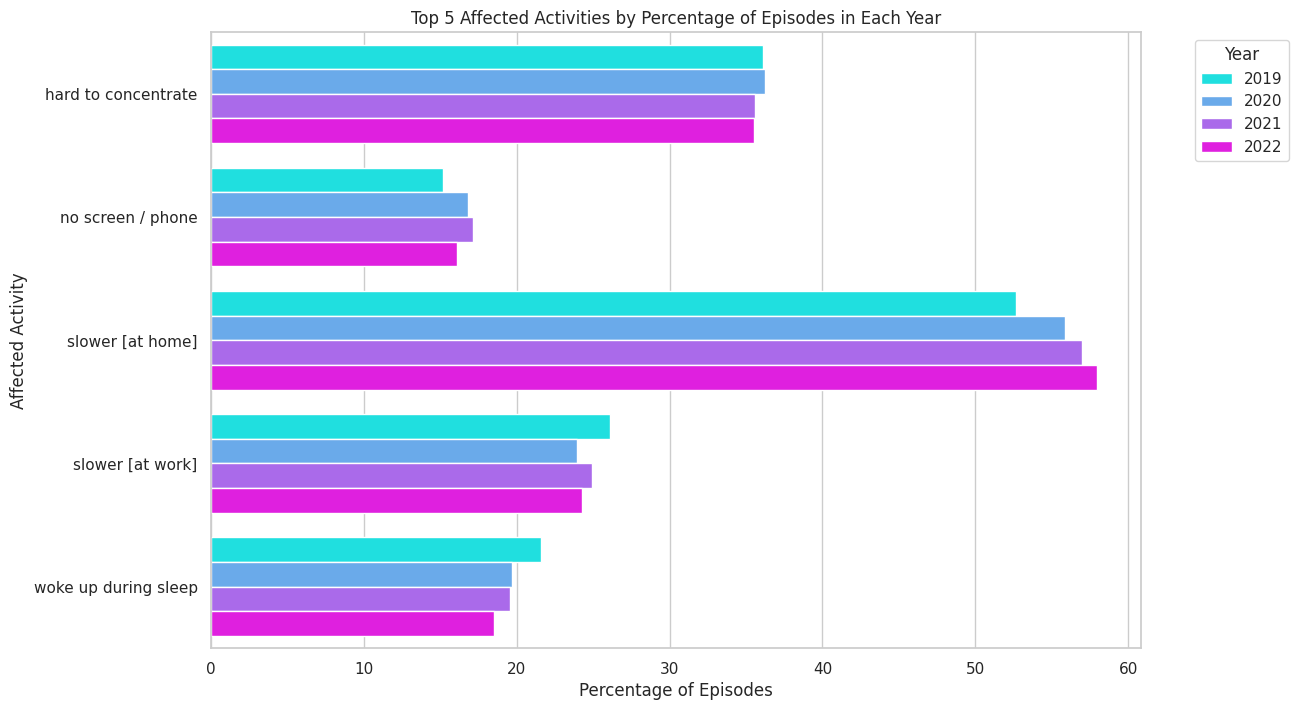

In [25]:
# Exclude the year 2018 from the dataset due to lack of data for affected activities
df_filtered = df[df['year'] != 2018]

# Split the 'affected_activities' column into individual activities
df_filtered['affected_activities_split'] = df_filtered['affected_activities'].str.lower().str.split(',\s*')

# Explode the list of activities so each activity is a separate row
df_exploded_activities = df_filtered.explode('affected_activities_split')

df_exploded_activities.rename(columns={'affected_activities_split': 'individual_activity'}, inplace=True)

# Filter rows to include only those with the top 5 affected activities
top_5_affected_activities_data = df_exploded_activities[
    df_exploded_activities['individual_activity'].isin(top_5_affected_activities)
]

# Calculate the total episodes per year
total_episodes_by_year = df_filtered.groupby('year').size()

# Calculate the counts of each individual affected activity per year
affected_activity_counts_by_year = top_5_affected_activities_data.groupby(['year', 'individual_activity']).size().reset_index(name='episode_count')

# Calculate the percentage of episodes per affected activity for each year
affected_activity_counts_by_year['percentage'] = affected_activity_counts_by_year.apply(
    lambda row: (row['episode_count'] / total_episodes_by_year[row['year']]) * 100, axis=1
)

# Print
print("Top 5 Affected Activities and Number of Reports with Each Activity per Year:")
print(affected_activity_counts_by_year[['year', 'individual_activity', 'episode_count', 'percentage']])

# Plot 
plt.figure(figsize=(12, 8))
sns.barplot(
    data=affected_activity_counts_by_year,
    x='percentage',
    y='individual_activity',
    hue='year',
    palette="cool"
)
plt.title("Top 5 Affected Activities by Percentage of Episodes in Each Year")
plt.xlabel("Percentage of Episodes")
plt.ylabel("Affected Activity")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Sleep Group Distribution (number of participants):
Short Sleep: 1714
Adequate Sleep: 1612
Excessive Sleep: 326


/tmp/ipykernel_77071/2227243337.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=groups, palette=colors)


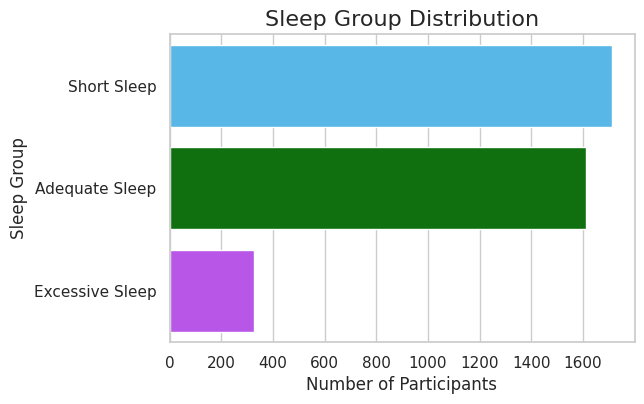

In [26]:
# Sleep groups data
activity_group_counts = df.groupby('hashed_uid')['sleep_group'].first().value_counts()

# Print the results
print("Sleep Group Distribution (number of participants):")
for group, count in activity_group_counts.items():
    print(f"{group}: {count}")

groups = list(activity_group_counts.index)
counts = list(activity_group_counts.values)

colors = []
for group in groups:
    if group == 'Adequate Sleep':
        colors.append('green')
    else:
        colors.append(sns.color_palette('cool', len(groups))[groups.index(group)])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=groups, palette=colors)
plt.title('Sleep Group Distribution', fontsize=16)
plt.xlabel('Number of Participants', fontsize=12)
plt.ylabel('Sleep Group', fontsize=12)
plt.show()

In [27]:
df['sleep_group'].value_counts()

sleep_group
Adequate Sleep     27096
Short Sleep        26759
Excessive Sleep     3180
Name: count, dtype: int64

/tmp/ipykernel_77071/3113840216.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='age_group', y='migraine_days_per_month', data=df, palette='Blues', order=age_group_order)
/tmp/ipykernel_77071/3113840216.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])


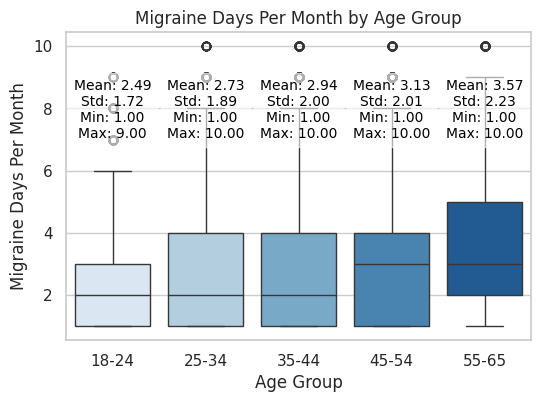

/tmp/ipykernel_77071/3113840216.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='age_group', y='pain_intensity', data=df, palette='Purples', order=age_group_order)
/tmp/ipykernel_77071/3113840216.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])


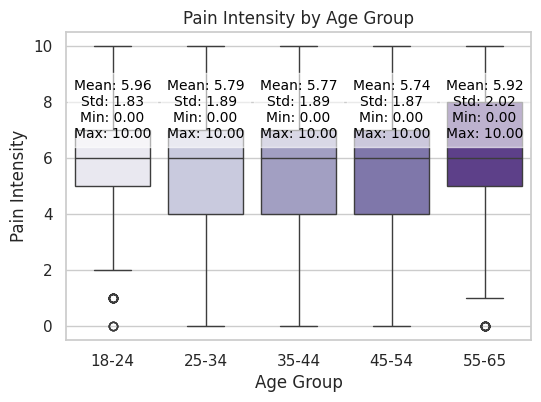

/tmp/ipykernel_77071/3113840216.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(x='age_group', y='attack_duration_hours', data=df, palette='Reds', order=age_group_order)
/tmp/ipykernel_77071/3113840216.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])


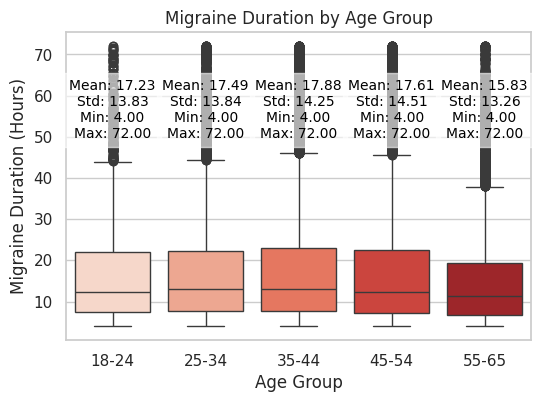

In [28]:
age_group_order = ["18-24", "25-34", "35-44", "45-54", "55-65"]
df['age_group'] = pd.Categorical(df['age_group'], categories=age_group_order, ordered=True)

# Function to add stats (mean, std, min, max) annotations
def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])
    
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1] - 0.15 * (ax.get_ylim()[1] - ax.get_ylim()[0]), 
            f'Mean: {row["mean"]:.2f}\nStd: {row["std"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}', 
            ha='center', va='top', color='black', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.6)
        )

# Boxplot for migraine_days_per_month by age groups
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(x='age_group', y='migraine_days_per_month', data=df, palette='Blues', order=age_group_order)
add_stats(ax1, df, 'age_group', 'migraine_days_per_month') 
plt.title("Migraine Days Per Month by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by age groups
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x='age_group', y='pain_intensity', data=df, palette='Purples', order=age_group_order)
add_stats(ax2, df, 'age_group', 'pain_intensity')
plt.title("Pain Intensity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by age groups
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(x='age_group', y='attack_duration_hours', data=df, palette='Reds', order=age_group_order)
add_stats(ax3, df, 'age_group', 'attack_duration_hours')
plt.title("Migraine Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Migraine Duration (Hours)")
plt.show()


/tmp/ipykernel_77071/696172081.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x=df['gender'], y=df['migraine_days_per_month'], palette='Blues')


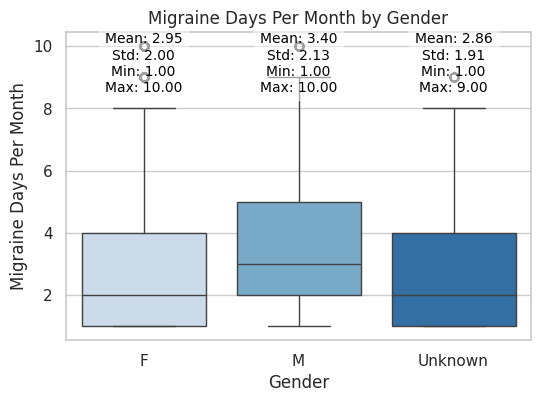

/tmp/ipykernel_77071/696172081.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x=df['gender'], y=df['pain_intensity'], palette='Purples')


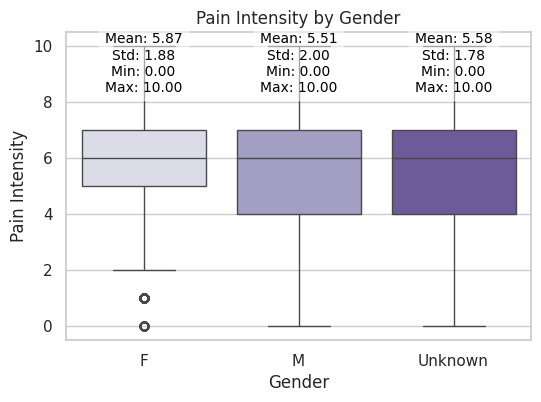

/tmp/ipykernel_77071/696172081.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(x=df['gender'], y=df['attack_duration_hours'], palette='Reds')


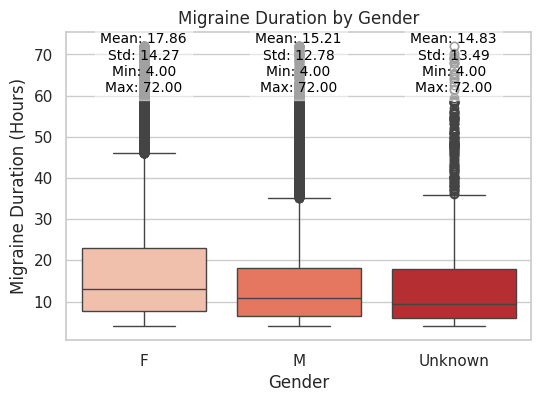

In [29]:
def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])
    
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1], 
            f'Mean: {row["mean"]:.2f}\nStd: {row["std"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}', 
            ha='center', va='top', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
        )

# Boxplot for migraine_days_per_month by gender
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(x=df['gender'], y=df['migraine_days_per_month'], palette='Blues')
add_stats(ax1, df, 'gender', 'migraine_days_per_month')  
plt.title("Migraine Days Per Month by Gender")
plt.xlabel("Gender")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by gender
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(x=df['gender'], y=df['pain_intensity'], palette='Purples')
add_stats(ax2, df, 'gender', 'pain_intensity') 
plt.title("Pain Intensity by Gender")
plt.xlabel("Gender")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by gender
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(x=df['gender'], y=df['attack_duration_hours'], palette='Reds')
add_stats(ax3, df, 'gender', 'attack_duration_hours')  
plt.title("Migraine Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Migraine Duration (Hours)")
plt.show()


/tmp/ipykernel_77071/2765421695.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(


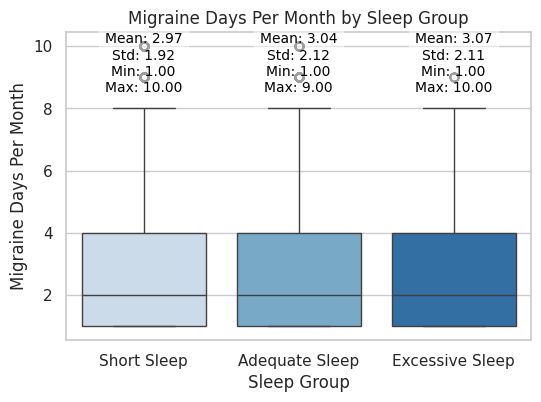

/tmp/ipykernel_77071/2765421695.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(


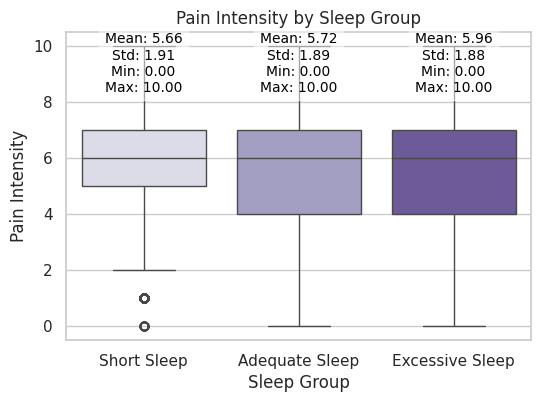

/tmp/ipykernel_77071/2765421695.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(


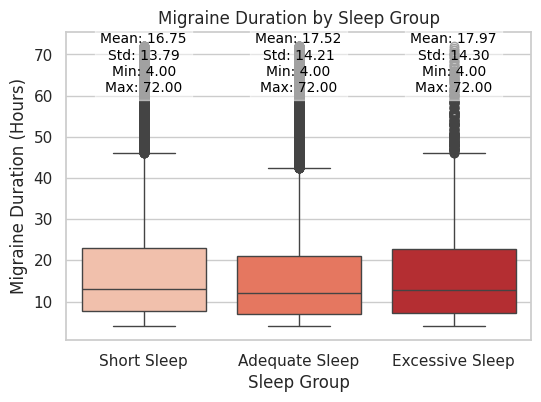

In [30]:
def add_stats(ax, data, x_column, y_column):
    grouped_stats = data.groupby(x_column)[y_column].agg(['mean', 'std', 'min', 'max'])
    for i, (index, row) in enumerate(grouped_stats.iterrows()):
        ax.text(
            i, 
            ax.get_ylim()[1], 
            f'Mean: {row["mean"]:.2f}\nStd: {row["std"]:.2f}\nMin: {row["min"]:.2f}\nMax: {row["max"]:.2f}', 
            ha='center', va='top', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
        )

sleep_order = ['Short Sleep', 'Adequate Sleep', 'Excessive Sleep']

# Boxplot for migraine_days_per_month by sleep_group
plt.figure(figsize=(6, 4))
ax1 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['migraine_days_per_month'], 
    palette='Blues'
)
add_stats(ax1, df, 'sleep_group', 'migraine_days_per_month') 
plt.title("Migraine Days Per Month by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Migraine Days Per Month")
plt.show()

# Boxplot for pain_intensity by sleep_group
plt.figure(figsize=(6, 4))
ax2 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['pain_intensity'], 
    palette='Purples'
)
add_stats(ax2, df, 'sleep_group', 'pain_intensity')  
plt.title("Pain Intensity by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Pain Intensity")
plt.show()

# Boxplot for migraine duration by sleep_group
plt.figure(figsize=(6, 4))
ax3 = sns.boxplot(
    x=pd.Categorical(df['sleep_group'], categories=sleep_order, ordered=True), 
    y=df['attack_duration_hours'], 
    palette='Reds'
)
add_stats(ax3, df, 'sleep_group', 'attack_duration_hours') 
plt.title("Migraine Duration by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Migraine Duration (Hours)")
plt.show()
